# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [109]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt



In [110]:
def residual_norm(A:np.ndarray,x:np.ndarray, b:np.ndarray):

    if isinstance(A, np.ndarray) and isinstance(x, np.ndarray) and isinstance(b, np.ndarray):
        if A.shape[0] == A.shape[1] and b.shape == x.shape:
            return np.linalg.norm(b - A @ np.transpose(x))
        else:
            return None
    else:
        return None

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

In [111]:
A,b = main.diag_dominant_matrix_A_b(3)
print(A)
print(b)

print(main.is_diag_dominant(A))

[[270  69  70]
 [ 11 426  54]
 [  6  22 434]]
[2 6 2]
True


***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

In [112]:
A,b = main.symmetric_matrix_A_b(3)
print(A)
print(b)
print(main.is_symmetric(A))

[[12  3  7]
 [ 3  6  3]
 [ 7  3  6]]
[5 0 0]
True


***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [113]:
m = 10

A1, b1 = main.random_matrix_Ab(m)
A2, b2 = main.diag_dominant_matrix_A_b(m)
A3, b3 = main.symmetric_matrix_A_b(m)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

**funkcji solve z biblioteki numpy**

In [114]:
label = ['solve','jacobi','gradienty','gmres']
times = []
residuum = []
if A1.shape[0] == A1.shape[1]:
    result_solve = np.linalg.solve(A1,b1)
    print(result_solve)
    residuum_solve = residual_norm(A1,result_solve,b1)
    print(residuum_solve)
    residuum.append(residuum_solve)
    saved_timing = %timeit -r 5 -n 10 -o result = np.linalg.solve(A1,b1)
    times.append(saved_timing.average)

[ 2.44561924 -1.08238196 -1.920751    0.9821975  -0.6309135  -0.60958589
 -0.13251756  1.68406903 -2.12110641  1.9626584 ]
5.6415482394184e-13
7.77 µs ± 1.35 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


**solve jacobi**

In [115]:
if main.is_diag_dominant(A1):
    print('Macierz spełnia warunki')
else:
    print('Macierz nie spełnia warunków')

x = np.zeros(b1.shape)
jac_solve = main.solve_jacobi(A1,b1,x)
print(jac_solve[0])
residuum_jac = residual_norm(A1,jac_solve[0],b1)
print(residuum_jac)
residuum.append(residuum_jac)
saved_timing_jac = %timeit -r 5 -n 10 -o result = main.solve_jacobi(A1,b1,x)
times.append(saved_timing_jac.average)



Macierz nie spełnia warunków
[-4.48094299e+215 -6.09176983e+216 -1.10271028e+216 -2.37458528e+217
 -2.80803071e+217 -4.21888605e+215 -7.15672149e+217 -6.19500512e+215
 -1.75576882e+216 -6.72909274e+215]
inf
938 µs ± 325 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


**metoda gradientów sprzężonych**

In [116]:
if main.is_symmetric(A1):
    print('Macierz spełnia warunki')
else:
    print('Macierz nie spełnia warunków')

gradienty = sp_linalg.cg(A1,b1)
print(gradienty[0])
residuum_gra = residual_norm(A1,gradienty[0],b1)
print(residuum_gra)
residuum.append(residuum_gra)
saved_timing_gra = %timeit -r 5 -n 10 -o result = sp_linalg.cg(A1,b1)
times.append(saved_timing_gra.average)


Macierz nie spełnia warunków
[-4.08122230e+08 -2.08041225e+08 -2.08425283e+08  2.91689129e+08
 -7.04496349e+08 -1.17439359e+08  2.21667133e+08  4.76306483e+08
  8.16372357e+08 -4.48144063e+08]
443784782477.89136
1.78 ms ± 108 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


**GMRES z biblioteki scipy**

In [117]:
if A1.shape[0] == A1.shape[1]:
    result_gmres = sp_linalg.gmres(A1,b1)
    print(result_gmres[0])
    residuum_gmres = residual_norm(A1,result_gmres[0],b1)
    print(residuum_gmres)
    residuum.append(residuum_gmres)
    saved_timing = %timeit -r 5 -n 10 -o result = np.linalg.solve(A1,b1)
    times.append(saved_timing.average)

[ 2.44561924 -1.08238196 -1.920751    0.9821975  -0.6309135  -0.60958589
 -0.13251756  1.68406903 -2.12110641  1.9626584 ]
1.1113578918876301e-12
9.41 µs ± 1.39 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


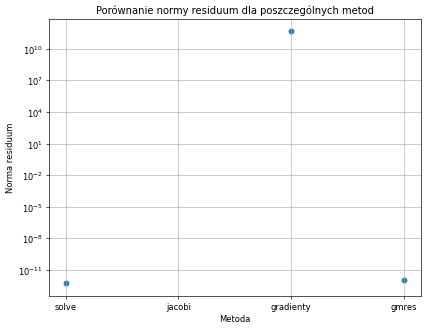

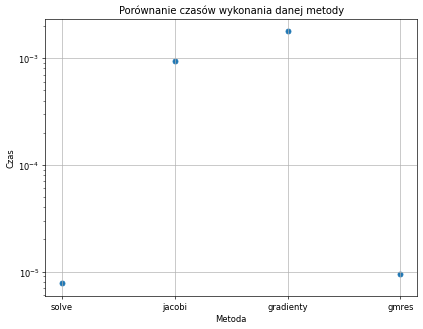

In [118]:
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,residuum)
plt.title("Porównanie normy residuum dla poszczególnych metod")
plt.ylabel("Norma residuum")
plt.xlabel("Metoda")
plt.semilogy()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,times)
plt.title("Porównanie czasów wykonania danej metody")
plt.ylabel("Czas")
plt.xlabel("Metoda")
plt.grid()
plt.semilogy()
plt.show()

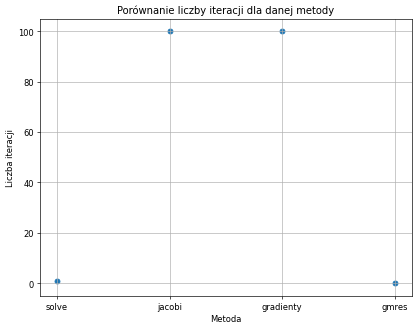

In [119]:
iterations = [1,jac_solve[1],gradienty[1],result_gmres[1]]
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,iterations)
plt.title("Porównanie liczby iteracji dla danej metody")
plt.ylabel("Liczba iteracji")
plt.xlabel("Metoda")
plt.grid()
plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

**funkcji solve z biblioteki numpy**

In [120]:
label = ['solve','jacobi','gradienty','gmres']
times = []
residuum = []
if A2.shape[0] == A2.shape[1]:
    result_solve = np.linalg.solve(A2,b2)
    print(result_solve)
    residuum_solve = residual_norm(A2,result_solve,b2)
    print(residuum_solve)
    residuum.append(residuum_solve)
    saved_timing = %timeit -r 5 -n 10 -o result = np.linalg.solve(A2,b2)
    times.append(saved_timing.average)

[ 7.45477231e-05  2.85716847e-03 -7.48635886e-04  2.52612817e-03
  5.10893296e-04  2.71757807e-03  3.17891980e-03 -5.58291353e-04
 -6.85258307e-04  4.64113902e-03]
1.5435101196479472e-15
11.9 µs ± 6.69 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


**solve jacobi**

In [121]:
if main.is_diag_dominant(A2):
    print('Macierz spełnia warunki')
else:
    print('Macierz nie spełnia warunków')

x = np.zeros(b2.shape)
jac_solve = main.solve_jacobi(A2,b2,x)
print(jac_solve[0])
residuum_jac = residual_norm(A2,jac_solve[0],b2)
print(residuum_jac)
residuum.append(float(residuum_jac))
saved_timing_jac = %timeit -r 5 -n 10 -o result = main.solve_jacobi(A2,b2,x)
times.append(saved_timing_jac.average)

Macierz spełnia warunki
[ 7.45472174e-05  2.85716812e-03 -7.48636416e-04  2.52612767e-03
  5.10892804e-04  2.71757751e-03  3.17891929e-03 -5.58291847e-04
 -6.85258825e-04  4.64113862e-03]
2.4361980840872286e-06
145 µs ± 10.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


**metoda gradientów sprzężonych**

In [122]:
if main.is_symmetric(A2):
    print('Macierz spełnia warunki')
else:
    print('Macierz nie spełnia warunków')

gradienty = sp_linalg.cg(A2,b2)
print(gradienty[0])
residuum_gra = residual_norm(A2,gradienty[0],b2)
print(residuum_gra)
residuum.append(residuum_gra)
saved_timing_gra = %timeit -r 5 -n 10 -o result = sp_linalg.cg(A2,b2)
times.append(saved_timing_gra.average)


Macierz nie spełnia warunków
[ 7.45590938e-05  2.85716399e-03 -7.48635062e-04  2.52613439e-03
  5.10871769e-04  2.71758316e-03  3.17892194e-03 -5.58282963e-04
 -6.85259084e-04  4.64111911e-03]
3.698284768650343e-05
223 µs ± 13.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


**GMRES z biblioteki scipy**

In [123]:
if A2.shape[0] == A2.shape[1]:
    result_gmres = sp_linalg.gmres(A2,b2)
    print(result_gmres[0])
    residuum_gmres = residual_norm(A2,result_gmres[0],b2)
    print(residuum_gmres)
    residuum.append(residuum_gmres)
    saved_timing = %timeit -r 5 -n 10 -o result = np.linalg.solve(A2,b2)
    times.append(saved_timing.average)

[ 7.45602237e-05  2.85717242e-03 -7.48632846e-04  2.52612931e-03
  5.10902179e-04  2.71756679e-03  3.17892261e-03 -5.58288612e-04
 -6.85273794e-04  4.64113686e-03]
2.3587149278561632e-05
8.48 µs ± 1.26 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


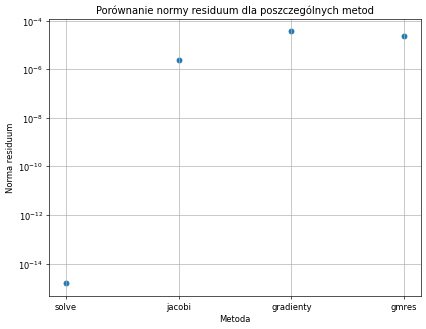

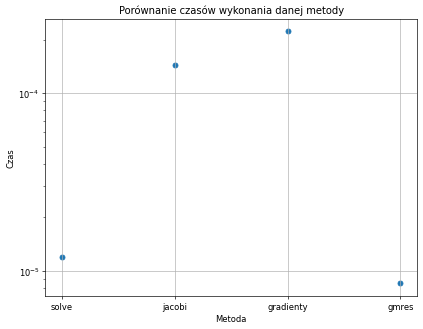

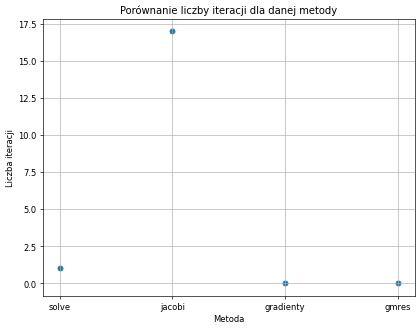

In [124]:
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,residuum)
plt.title("Porównanie normy residuum dla poszczególnych metod")
plt.ylabel("Norma residuum")
plt.xlabel("Metoda")
plt.semilogy()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,times)
plt.title("Porównanie czasów wykonania danej metody")
plt.ylabel("Czas")
plt.xlabel("Metoda")
plt.grid()
plt.semilogy()
plt.show()

iterations = [1,jac_solve[1],gradienty[1],result_gmres[1]]
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,iterations)
plt.title("Porównanie liczby iteracji dla danej metody")
plt.ylabel("Liczba iteracji")
plt.xlabel("Metoda")
plt.grid()
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [125]:
label = ['solve','jacobi','gradienty','gmres']
times = []
residuum = []
if A3.shape[0] == A3.shape[1]:
    result_solve = np.linalg.solve(A3,b3)
    print(result_solve)
    residuum_solve = residual_norm(A3,result_solve,b3)
    print(residuum_solve)
    residuum.append(residuum_solve)
    saved_timing = %timeit -r 5 -n 10 -o result = np.linalg.solve(A3,b3)
    times.append(saved_timing.average)

if main.is_diag_dominant(A3):
    print('Macierz spełnia warunki')
else:
    print('Macierz nie spełnia warunków')

x = np.zeros(b3.shape)
jac_solve = main.solve_jacobi(A3,b3,x)
print(jac_solve[0])
residuum_jac = residual_norm(A3,jac_solve[0],b3)
print(residuum_jac)
residuum.append(float(residuum_jac))
saved_timing_jac = %timeit -r 5 -n 10 -o result = main.solve_jacobi(A3,b3,x)
times.append(saved_timing_jac.average)

if main.is_symmetric(A3):
    print('Macierz spełnia warunki')
else:
    print('Macierz nie spełnia warunków')

gradienty = sp_linalg.cg(A3,b3)
print(gradienty[0])
residuum_gra = residual_norm(A3,gradienty[0],b3)
print(residuum_gra)
residuum.append(residuum_gra)
saved_timing_gra = %timeit -r 5 -n 10 -o result = sp_linalg.cg(A3,b3)
times.append(saved_timing_gra.average)

if A3.shape[0] == A3.shape[1]:
    result_gmres = sp_linalg.gmres(A3,b3)
    print(result_gmres[0])
    residuum_gmres = residual_norm(A3,result_gmres[0],b3)
    print(residuum_gmres)
    residuum.append(residuum_gmres)
    saved_timing = %timeit -r 5 -n 10 -o result = np.linalg.solve(A3,b3)
    times.append(saved_timing.average)

[ 2.54455729 -0.92995904  0.48715508 -0.65701888  1.1064029  -1.21722284
 -1.01065652 -0.42553777 -0.22281437  0.56916976]
1.0480881692492569e-14
8.58 µs ± 861 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Macierz nie spełnia warunków
[-3.14166948e+117 -5.28537817e+117 -4.13300142e+117 -4.13799485e+117
 -2.10489731e+117 -1.43517239e+118 -1.97230100e+117 -1.05482205e+118
 -1.16508399e+118 -6.08085639e+117]
1.4707635187633155e+120
766 µs ± 83 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Macierz spełnia warunki
[ 2.5445573  -0.92995904  0.48715508 -0.65701888  1.1064029  -1.21722284
 -1.01065651 -0.42553777 -0.22281437  0.56916976]
6.419445108500679e-07
239 µs ± 9.83 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
[ 2.54455729 -0.92995904  0.48715508 -0.65701888  1.1064029  -1.21722284
 -1.01065652 -0.42553777 -0.22281437  0.56916976]
1.7835586898960545e-14
7.6 µs ± 1.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


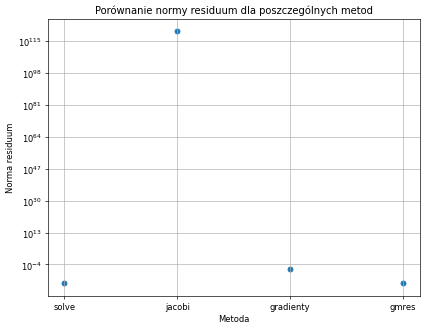

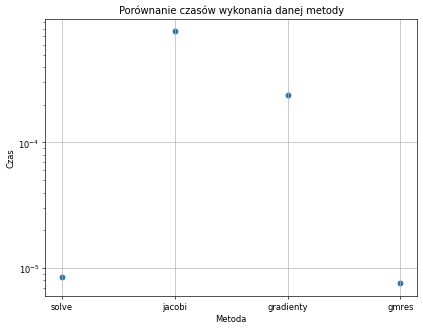

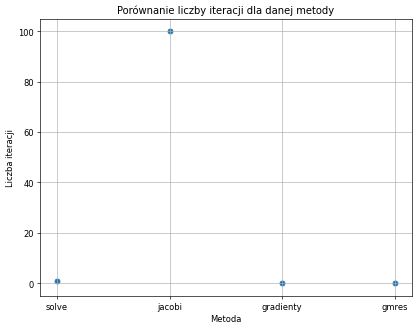

In [126]:
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,residuum)
plt.title("Porównanie normy residuum dla poszczególnych metod")
plt.ylabel("Norma residuum")
plt.xlabel("Metoda")
plt.semilogy()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,times)
plt.title("Porównanie czasów wykonania danej metody")
plt.ylabel("Czas")
plt.xlabel("Metoda")
plt.grid()
plt.semilogy()
plt.show()

iterations = [1,jac_solve[1],gradienty[1],result_gmres[1]]
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(label,iterations)
plt.title("Porównanie liczby iteracji dla danej metody")
plt.ylabel("Liczba iteracji")
plt.xlabel("Metoda")
plt.grid()
plt.show()

WNIOSKI:
Na dzisiejszych laboratoriach zapoznaliśmy się z iteracyjnymi metodami rozwiązywania układów równań liniowych. Naszym głownym zadaniem było znaczać czas wykonywania i dokoładność poszczególnych metod. Okazało sie, że najszybsza i najdokładniejsza jest funkcja solve z biblioteki numpy. Następna w kolejności jest metoda GMRES która jest trochę szybsza ale mniej dokładna. Co do metody Jacobiego i metody gradientów sprzężonych. Metoda Jacobiego działa poprawnie gdy dostanie macierz diagonelnie zdominowaną , a metoda gradientów sprzężonych działa poprawnie z macierzą dodatnio określoną.


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)